In [2]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
__________

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'Downloads/alice_suzu/train'
validation_dir = 'Downloads/alice_suzu/validation'

# # rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,     # directory
        target_size=(150, 150),     # input shape (resized to 150x150)
        batch_size=20,
        class_mode='binary')     # binary labels

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 168s 2s/step - loss: 0.7000 - acc: 0.5155 - val_loss: 0.6893 - val_acc: 0.5180
Epoch 2/30
100/100 [==============================] - 167s 2s/step - loss: 0.6777 - acc: 0.5785 - val_loss: 0.6798 - val_acc: 0.5990
Epoch 3/30
100/100 [==============================] - 167s 2s/step - loss: 0.6460 - acc: 0.6240 - val_loss: 0.6831 - val_acc: 0.5280
Epoch 4/30
100/100 [==============================] - 166s 2s/step - loss: 0.6163 - acc: 0.6395 - val_loss: 0.6497 - val_acc: 0.6390
Epoch 5/30
100/100 [==============================] - 166s 2s/step - loss: 0.5880 - acc: 0.6815 - val_loss: 0.6356 - val_acc: 0.6450
Epoch 6/30
100/100 [==============================] - 165s 2s/step - loss: 0.5592 - acc: 0.7040 - val_loss: 0.6152 - val_acc: 0.6450
Epoch 7/30
100/100 [==============================] - 167s 2s/step - loss: 0.5286 - acc: 0.7310 - val_loss: 0.5992 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 186s 2s/step - 

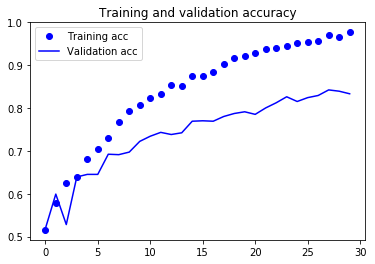

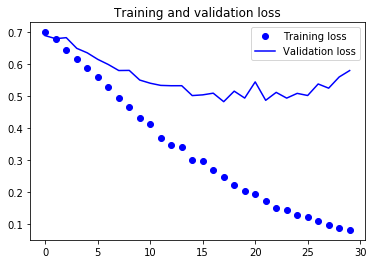

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.save('alice_suzu')

In [12]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
model = load_model('alice_suzu')

test_dir = 'downloads/alice_suzu/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
    
test_loss, test_acc = model.evaluate_generator(test_generator, steps=35)
print('test loss:', test_loss)
print('test acc:', test_acc)


Found 1000 images belonging to 2 classes.
test loss: 0.6507015213370323
test acc: 0.8114285707473755
